## Exploratory Data Analysis for Baseball Database

In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from ballbase import figures

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [2]:
import Baseball_data_investigation
df = Baseball_data_investigation.main()
df.head()

Processed hall of fame data
There are 250 members of the Hall of Fame

Processed All Star data
aaronha01    25
musiast01    24
mayswi01     24
mantlmi01    20
ripkeca01    19
Name: allstar_count, dtype: int64

Processed Player Awards data
bondsba01    47
willite01    39
dimagjo01    36
musiast01    34
johnswa01    33
Name: award_count, dtype: int64

Processed Salary data
            mean_salary  max_salary  min_salary  \
playerID                                          
aardsda01  1.322821e+06   4500000.0    300000.0   
aasedo01   5.750000e+05    675000.0    400000.0   
abadan01   3.270000e+05    327000.0    327000.0   
abadfe01   7.532800e+05   1250000.0    418000.0   
abbotje01  2.462500e+05    300000.0    175000.0   

           mean_salary_standardized_annually  \
playerID                                       
aardsda01                          -0.440097   
aasedo01                            0.299314   
abadan01                           -0.663649   
abadfe01                    

C:\Users\Adam\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:77: RuntimeWarning: unorderable types: str() > int(), sort order is undefined for incomparable objects
  result = result.union(other)


,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note,allstar_count,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
aardsda01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aaronha01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aasedo01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abadan01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abbeybe01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
columns = list(df.columns.values)
print(columns)

['playerID', 'yearid', 'votedBy', 'ballots', 'needed', 'votes', 'inducted', 'category', 'needed_note', 'allstar_count', 'award_count', 'mean_salary', 'max_salary', 'min_salary', 'mean_salary_standardized_annually', 'max_salary_standardized_annually', 'min_salary_standardized_annually', 'mode_schoolID', 'name_full', 'city', 'state', 'country', 'playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry', 'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay', 'deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast', 'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame', 'retroID', 'bbrefID']


In [4]:
df.isnull().values.any()

True

count    1343.000000
mean        4.585257
std         5.603915
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max        47.000000
Name: award_count, dtype: float64

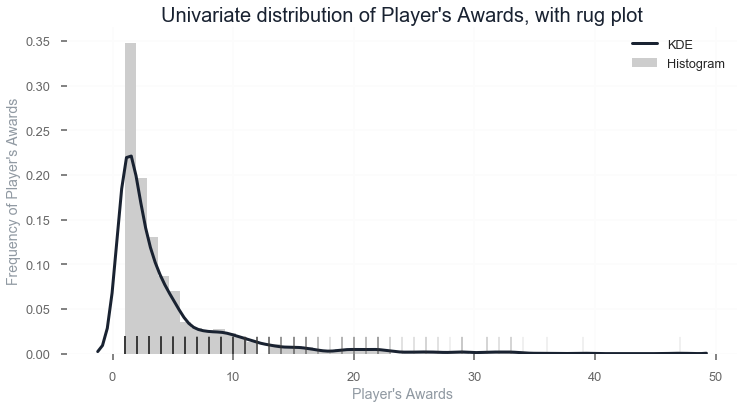

In [8]:
fig_1 = figures.univariate(df['award_count'].dropna(), 'Player\'s Awards')
df['award_count'].dropna().describe()

count    1774.000000
mean        2.901917
std         2.927680
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        25.000000
Name: allstar_count, dtype: float64

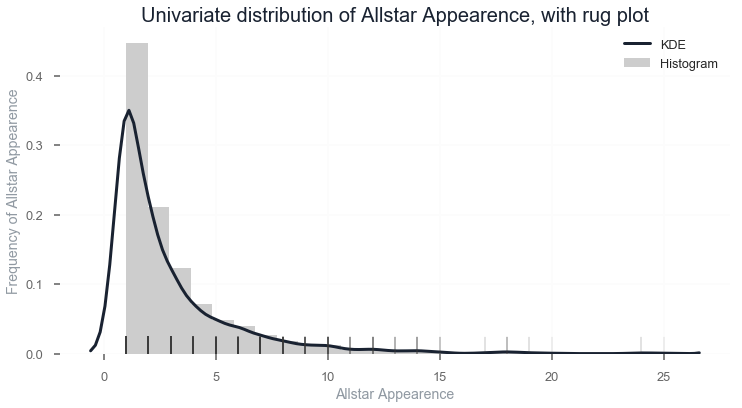

In [9]:
fig_2 = figures.univariate(df['allstar_count'].dropna(), 'Allstar Appearence', bin_n=25)
df['allstar_count'].dropna().describe()

count    5155.000000
mean        0.054906
std         1.097218
min        -1.212567
25%        -0.644390
50%        -0.507863
75%         0.360500
max         7.489766
Name: max_salary_standardized_annually, dtype: float64

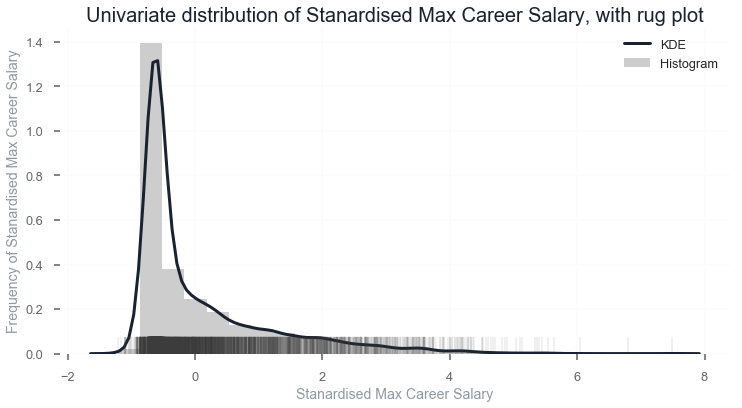

In [11]:
fig_2 = figures.univariate(df['max_salary_standardized_annually'].dropna(), 'Stanardised Max Career Salary', bin_n=25)
df['max_salary_standardized_annually'].dropna().describe()